## Problem Definition

### Human activity recognition, or HAR for short, is the problem of using sensors to predict what a person is doing based on a person's motion trajectory. These actions are usually normal indoor activities such as standing, sitting, jumping, and climbing stairs. Sensors are usually located on objects, such as smartphones or vests, and they usually record accelerometer data in three dimensions (x, y, z), gyroscope, magnetometer and gps of the phone.


The features seem to have a main name and some information on how they have been computed attached. Grouping the main names will reduce the dimensions for the first impression.

## Datasets


### 30 participants performed activities of daily living while carrying a waist-mounted smartphone. The phone was configured to record two implemented sensors (accelerometer and gyroscope). For these time series the directors of the underlying study performed feature generation and generated the dataset by moving a fixed-width window of 2.56s over the series. Since the windows had 50% overlap the resulting points are equally spaced (1.28s)

In [28]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings 
%matplotlib inline
warnings.filterwarnings ('ignore')
df = pd.read_csv('df_clean.csv')
X = df.drop(['subject', 'Activity'], axis=1)
y = df.Activity

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from matplotlib import style
style.use("ggplot")
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))


In [5]:

import warnings 
%matplotlib inline
warnings.filterwarnings ('ignore')
import itertools
from sklearn.metrics import confusion_matrix

In [6]:
df = pd.read_csv('df_clean.csv')
df.shape

(10299, 564)

In [7]:
labels=['Laying', 'Sitting','Standing','Walking','Walking_Downstairs','Walking_Upstairs']

### Reading Pre-Processed Data

In [8]:
data=pd.read_csv('df_clean.csv')
data.head()

,Unnamed: 0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,1
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,1
2,2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,1
3,3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,1
4,4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,1


In [9]:
accuracy_scores = np.zeros(4)

In [10]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [11]:
def print_grid_search_attributes(model):
    
    # Let's print the best estimator that gave highest score
    
    printmd('**Best Estimator:**', color='blue')
    print('{}\n'.format(model.best_estimator_))


    # Let's print the best parameters that gave best results
    
    printmd('**Best parameters:**', color='blue')
    print('{}\n'.format(model.best_params_))


    #  Let's print the number of cross validation splits
    
    printmd('**Number of CrossValidation sets:**', color='blue')
    print('{}\n'.format(model.n_splits_))


    # Let's print the Best score of the best estimator
    
    printmd('**Best Score:**', color='blue')
    print('{}\n'.format(model.best_score_))

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [13]:
print(X_train)

      Unnamed: 0  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
401          401           0.277897          -0.016520          -0.105180   
3436        3436           0.272100          -0.026672          -0.099319   
3439        3439           0.278350          -0.014307          -0.114389   
6309        6309           0.272475          -0.030557          -0.133180   
5003        5003           0.196508           0.016571          -0.064320   
...          ...                ...                ...                ...   
2895        2895           0.276460          -0.018821          -0.115357   
7813         461           0.298220          -0.022571          -0.138333   
905          905           0.277711          -0.016514          -0.109158   
5192        5192           0.284885          -0.006651          -0.114939   
235          235           0.277258          -0.014249          -0.112205   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-

In [14]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7209, 562),(7209,))
X_test  and y_test  : ((3090, 562),(3090,))


### Confusion Matrix

In [15]:
from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [16]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [25]:
# Generic function to any model

from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # Let's create an empty dictionary to be returned by the function
    results = dict()
    
    # Let's calculate & print the total training time
    
    train_start_time = datetime.now()
    model.fit(X_train, y_train)
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    printmd('Training_time(HH:MM:SS.ms) - {}'.format(results['training_time']), color='blue')
        
    # Let's calculate & print the test time
    
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    printmd('testing time(HH:MM:SS:ms) - {}'.format(results['testing_time']), color='blue')
    results['predicted'] = y_pred
   
    # Let's calculate the Accuracy of Model
    
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    results['accuracy'] = accuracy
    printmd('**Accuracy:**', color='blue')
    print('{}'.format(accuracy))
        
    # Let's get the Confusion Matrix
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    # Plotting Confusion Matrix
    
    printmd('**Confusion Matrix:**', color='blue')
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=labels, title='Normalized confusion matrix', cmap=plt.cm.YlGn, )
    plt.show()
        
    # Plotting Normalized Confusion Matrix
    
    printmd('**Normalized Confusion Matrix:**', color='blue')
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # PLotting classification report
    
    printmd('**Classifiction Report**', color='blue')
    classification_report = metrics.classification_report(y_test, y_pred)
    results['classification_report'] = classification_report
    print(classification_report)
    
    # Adding the trained model to the results
    
    results['model'] = model
    
    return results

In [18]:
def print_grid_search_attributes(model):
    
    # Let's print the best estimator that gave highest score
    
    printmd('**Best Estimator:**', color='blue')
    print('{}\n'.format(model.best_estimator_))


    # Let's print the best parameters that gave best results
    
    printmd('**Best parameters:**', color='blue')
    print('{}\n'.format(model.best_params_))


    #  Let's print the number of cross validation splits
    
    printmd('**Number of CrossValidation sets:**', color='blue')
    print('{}\n'.format(model.n_splits_))


    # Let's print the Best score of the best estimator
    
    printmd('**Best Score:**', color='blue')
    print('{}\n'.format(model.best_score_))

### Logistic Regression

In [19]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [23]:
labels=['Laying', 'Sitting','Standing','Walking','Walking_Downstairs','Walking_Upstairs']

Fitting 5 folds for each of 8 candidates, totalling 40 fits


<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:00:31.404406</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00.023935</span>

<span style='color:blue'>**Accuracy:**</span>

0.8155339805825242


<span style='color:blue'>**Confusion Matrix:**</span>

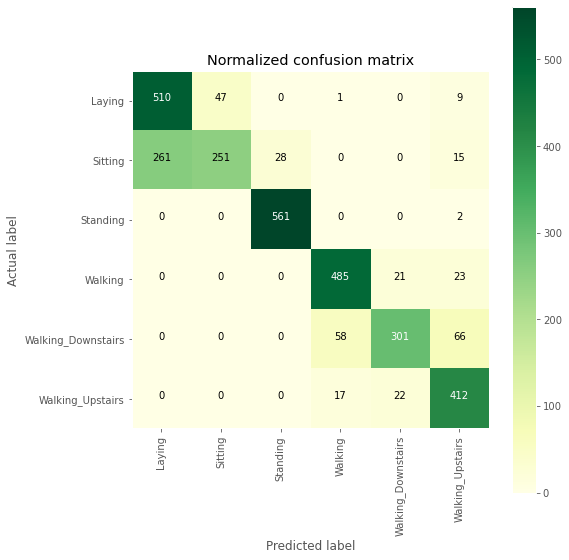

<span style='color:blue'>**Normalized Confusion Matrix:**</span>

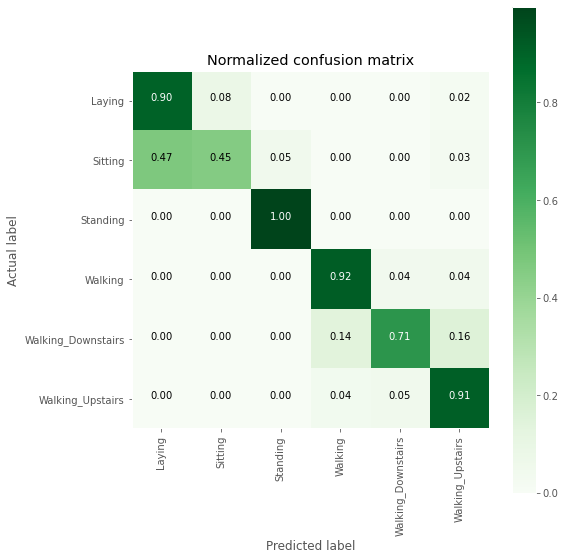

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.66      0.90      0.76       567
           2       0.84      0.45      0.59       555
           3       0.95      1.00      0.97       563
           4       0.86      0.92      0.89       529
           5       0.88      0.71      0.78       425
           6       0.78      0.91      0.84       451

    accuracy                           0.82      3090
   macro avg       0.83      0.81      0.81      3090
weighted avg       0.83      0.82      0.81      3090



<span style='color:blue'>**Best Estimator:**</span>

LogisticRegression(C=0.5)



<span style='color:blue'>**Best parameters:**</span>

{'C': 0.5, 'penalty': 'l2'}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.8318818511955695



In [21]:
parameters = {'C':[0.125, 0.25, 0.5, 1], 'penalty':['l2', 'l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(log_reg_grid_results['model'])

## Linear SVC

In [22]:
from sklearn.tree import DecisionTreeClassifier

Fitting 5 folds for each of 6 candidates, totalling 30 fits


<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:00:30.989449</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00.027931</span>

<span style='color:blue'>**Accuracy:**</span>

0.9326860841423948


<span style='color:blue'>**Confusion Matrix:**</span>

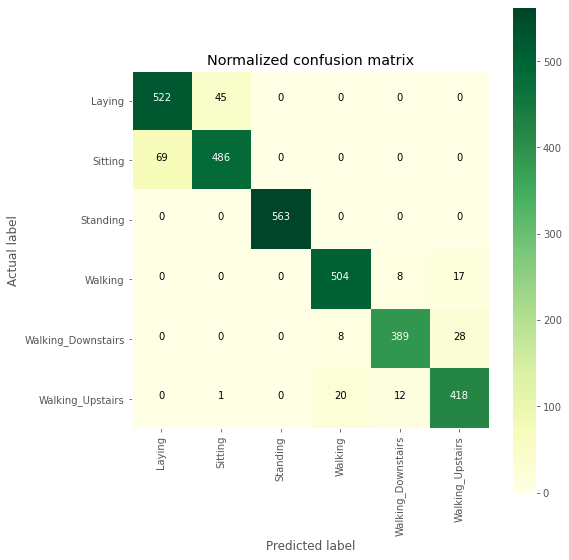

<span style='color:blue'>**Normalized Confusion Matrix:**</span>

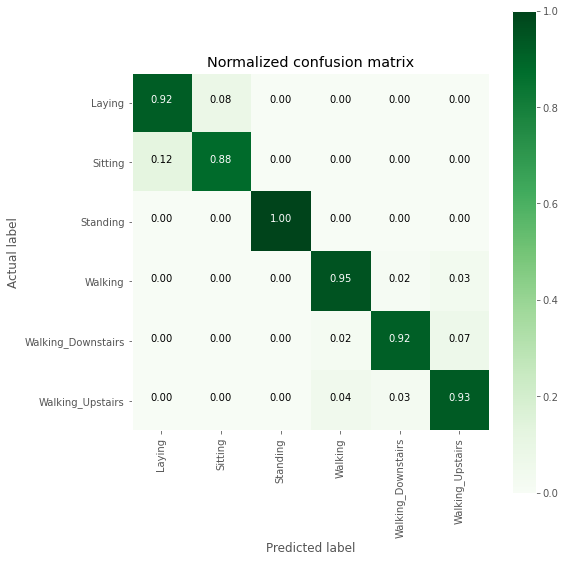

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.88      0.92      0.90       567
           2       0.91      0.88      0.89       555
           3       1.00      1.00      1.00       563
           4       0.95      0.95      0.95       529
           5       0.95      0.92      0.93       425
           6       0.90      0.93      0.91       451

    accuracy                           0.93      3090
   macro avg       0.93      0.93      0.93      3090
weighted avg       0.93      0.93      0.93      3090



<span style='color:blue'>**Best Estimator:**</span>

DecisionTreeClassifier(max_depth=9)



<span style='color:blue'>**Best parameters:**</span>

{'max_depth': 9}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.9328625424823453



In [23]:
parameters = {'max_depth':np.arange(4,10,1)}
dtree = DecisionTreeClassifier()
dtree_grid = GridSearchCV(dtree, param_grid=parameters, verbose=1, n_jobs=-1)
dtree_grid_results = perform_model(dtree_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dtree_grid_results['model'])

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

Fitting 5 folds for each of 6 candidates, totalling 30 fits


<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:00:29.816268</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00.034906</span>

<span style='color:blue'>**Accuracy:**</span>

0.933009708737864


<span style='color:blue'>**Confusion Matrix:**</span>

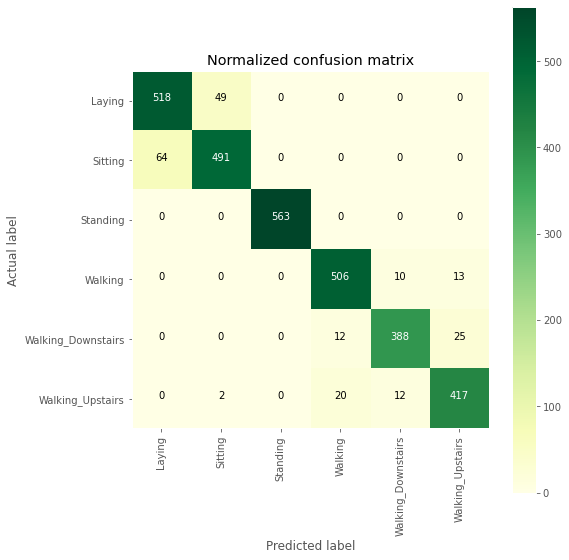

<span style='color:blue'>**Normalized Confusion Matrix:**</span>

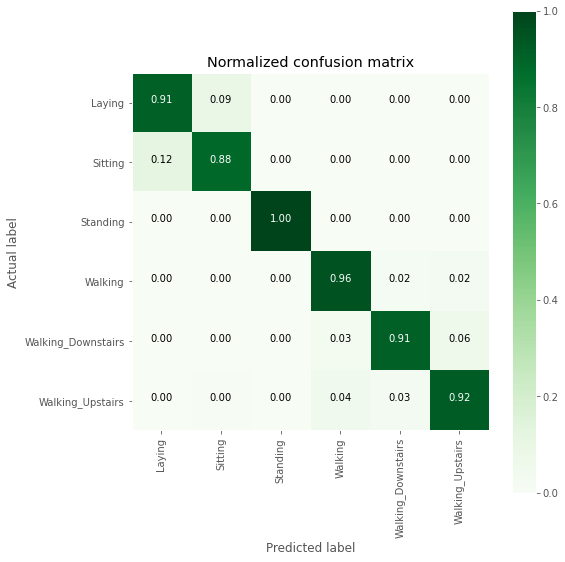

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.89      0.91      0.90       567
           2       0.91      0.88      0.90       555
           3       1.00      1.00      1.00       563
           4       0.94      0.96      0.95       529
           5       0.95      0.91      0.93       425
           6       0.92      0.92      0.92       451

    accuracy                           0.93      3090
   macro avg       0.93      0.93      0.93      3090
weighted avg       0.93      0.93      0.93      3090



<span style='color:blue'>**Best Estimator:**</span>

DecisionTreeClassifier(max_depth=9)



<span style='color:blue'>**Best parameters:**</span>

{'max_depth': 9}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.9334167500031281



In [25]:
parameters = {'max_depth':np.arange(4,10,1)}
dtree = DecisionTreeClassifier()
dtree_grid = GridSearchCV(dtree, param_grid=parameters, verbose=1, n_jobs=-1)
dtree_grid_results = perform_model(dtree_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dtree_grid_results['model'])

## KNN
#### from the scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
def get_dist(x1, x2):
    return np.linalg.norm(x1 - x2)
#function for getting distance b/w 2 points

In [3]:
def get_k_neighbours(x_train, y_train, k, x):
    dist = []
    for i in range(y_train.size):
        dist.append(tuple((i, get_dist(x_train[i], x))))
    dist.sort(key=lambda x: x[1])
    return dist[:k+1]
#function for getting k nearest nearest points

In [4]:
def get_pred(neighbours, y_train):
    count_0 = 0
    count_1 = 0
    for i in range(len(neighbours)):
        if y_train[neighbours[i][0]] == 0:
            count_0+=1
        else:
            count_1+=1
    return 1 if count_1>count_0 else 0
#function to get prediction

In [5]:
def get_predictions(x_train, x_test, y_train, y_test, k):
    y_pred = []
    for i in range(y_test.size):
            neighbours = get_k_neighbours(x_train, y_train, k, x_test[i])
            y_pred.append(get_pred(neighbours, y_train))
    return y_pred
#function to get prediction on test set

In [ ]:
df = pd.read_csv("df_clean.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
x_data = df[df.columns.difference(['Activity', 'subject'])]
y_data = df['Activity']
le = LabelEncoder()
y_data = le.fit_transform(y_data)

best_accuracy = 0
accuracy_sum = 0
best_k =  1
for k in range(1, 27, 2):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle=True, test_size = 1/3)
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    y_pred = get_predictions(x_train, x_test, y_train, y_test, k)
    accuracy_sum += accuracy_score(y_test, y_pred)
    if best_accuracy < accuracy_score(y_test, y_pred):
        best_accuracy = accuracy_score(y_test, y_pred)
        best_k = k
    print(f"Classification report of k = {k}")
    print(classification_report(y_test, y_pred))
print(f"Average accuracy = {accuracy_sum/(25/2)}")
print(f"Best k = {best_k}")
#function to evalutate the model

Classification report of k = 1
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       630
           1       0.17      0.77      0.28       601
           2       0.00      0.00      0.00       645
           3       0.00      0.00      0.00       576
           4       0.00      0.00      0.00       478
           5       0.00      0.00      0.00       503

    accuracy                           0.31      3433
   macro avg       0.16      0.29      0.19      3433
weighted avg       0.18      0.31      0.21      3433



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report of k = 3
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       619
           1       0.18      0.83      0.29       592
           2       0.00      0.00      0.00       642
           3       0.00      0.00      0.00       579
           4       0.00      0.00      0.00       481
           5       0.00      0.00      0.00       520

    accuracy                           0.32      3433
   macro avg       0.17      0.30      0.20      3433
weighted avg       0.19      0.32      0.21      3433



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report of k = 5
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       625
           1       0.19      0.85      0.31       615
           2       0.00      0.00      0.00       633
           3       0.00      0.00      0.00       572
           4       0.00      0.00      0.00       485
           5       0.00      0.00      0.00       503

    accuracy                           0.33      3433
   macro avg       0.18      0.30      0.20      3433
weighted avg       0.19      0.33      0.22      3433



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report of k = 7
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       646
           1       0.18      0.84      0.29       574
           2       0.00      0.00      0.00       620
           3       0.00      0.00      0.00       600
           4       0.00      0.00      0.00       466
           5       0.00      0.00      0.00       527

    accuracy                           0.32      3433
   macro avg       0.17      0.30      0.20      3433
weighted avg       0.19      0.32      0.22      3433



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report of k = 9
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       632
           1       0.18      0.85      0.30       581
           2       0.00      0.00      0.00       669
           3       0.00      0.00      0.00       576
           4       0.00      0.00      0.00       438
           5       0.00      0.00      0.00       537

    accuracy                           0.32      3433
   macro avg       0.18      0.30      0.20      3433
weighted avg       0.19      0.32      0.22      3433



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
skf_results = pd.DataFrame([['Logistic Regression', 0.82,0.83,0.81,0.81]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

skf_model = pd.DataFrame([['Linear SVC', 0.93,0.94,0.94,0.94]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
skf_results = skf_results.append(skf_model, ignore_index = True)
skf_model = pd.DataFrame([['Decision Tree', 0.93,0.94,0.93,0.93]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
skf_results = skf_results.append(skf_model, ignore_index = True)
skf_model = pd.DataFrame([['KNN', 0.32,0.18,0.30,0.20]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
skf_results = skf_results.append(skf_model, ignore_index = True)

In [14]:
skf_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.82,0.83,0.81,0.81
1,Linear SVC,0.93,0.94,0.94,0.94
2,Decision Tree,0.93,0.94,0.93,0.93
3,KNN,0.32,0.18,0.30,0.20


<BarContainer object of 4 artists>

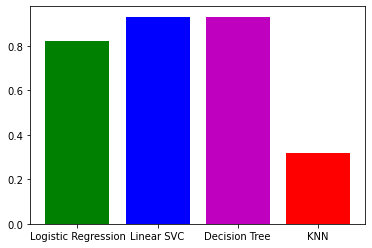

In [16]:
import pandas as pd
 
import matplotlib.pyplot as plt
plt.bar(x=skf_results['Model'],
 
        height=skf_results['Accuracy'],
       color='gbmr')